### Time Series Analysis : AR Model

#### AR(p) - Autoregressive model of order p

The autoregression model specifies the next step in the sequence depends linearly on its own previous values and on a stochastic term.

$$Y_{t} = c + \varphi_{1}Y_{t-1} +...+ \varphi_{p}Y_{t-p} + \varepsilon_{t}$$
Where $\varphi_{i}$ are the parameters of the model, $c$ is a constant, and $\varepsilon_{t}$ is white noise.

Because the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).

The **lag operator** is denoted by $B$ and used to express lagged values of the process so 
* $BX_t = X_{t−1}$* $B^2X_t = X_{t−2}$* $B^3X_t = X_{t−3}$* $B^dX_t = X_{t−d}$
The **characteristic polynomial** of the time series is:

$$\Phi(x) = 1 - \varphi_1x - \varphi_2x^2 - ... - \varphi_px^p$$

Extract the roots of this polynomial by soloving $\Phi(x)=0$. If all the roots are outside the unit circle then the process is stationary.

>**For example: AR(1)**
>
>$$ Y_t = \varphi_{1} Y_{t-1} + \varepsilon_{t}$$ 
>can be written as: 
>
>$$(1-\varphi_{1} B)Y_t = \varepsilon_{t}$$
>
>Solving its characteristic polynomial gives:
>
>$$1-\varphi_{1} x = 0 \Rightarrow x=\frac{1}{\varphi_{1}}$$
> Thus, to make this AR(1) process stationary, we have to have:
> $$|\frac{1}{\varphi_{1}}| > 1 \Rightarrow |\varphi_{1}|<1 \Rightarrow -1< \varphi_{1} <1$$

**Theorem**

**If $Y_t ∼ AR(p)$, $Y_t$ is a stationary process if and only if the modulus of all the roots of the characteristic polynomial are greater than one, or equivalently $||\varphi_{i}|| < 1, i=1,2,...p$.**

We normally restrict autoregressive models to stationary data, meaning:

$\text{For an AR(1) model: } -1 < \varphi_1 < 1$  
$\text{For an AR(2) model: } -1 < \varphi_2 < 1 \text{ , } \varphi_1 + \varphi_2 < 1\text{ , } \varphi_2 - \varphi_1 < 1$  

when $p>=3$ , the restrictions are much more complicated. Time series packages will takes care of these restrictions when estimating a model.

#### Exmple 1. Simulate AR(1) process

In [1]:
# import the module for simulating data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
from statsmodels.tsa.arima_process import ArmaProcess

##### ACF and PACF plots of AR(1) process

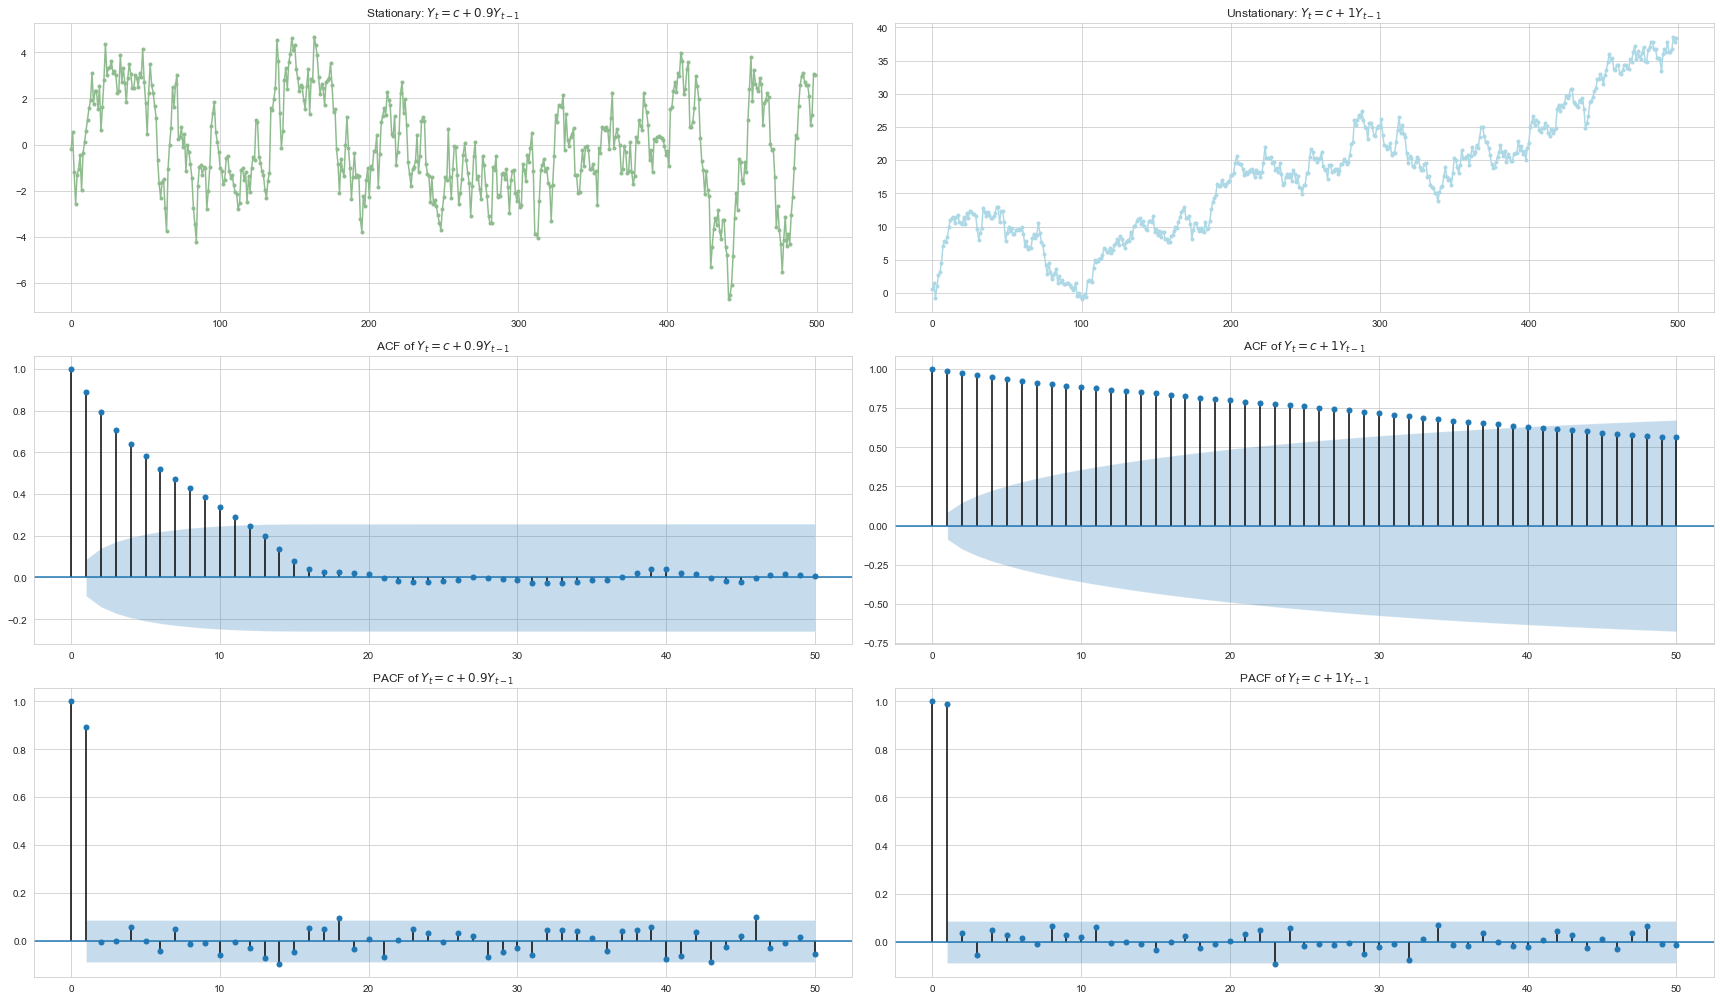

In [4]:
from statsmodels.graphics import tsaplots
ma = np.array([1])
ar1 = np.array([1, -0.9])
AR_object1 = ArmaProcess(ar1, ma)
simulated_data_1 = AR_object1.generate_sample(nsample=500)
ar2 = np.array([1, -1])
AR_object2 = ArmaProcess(ar2, ma)
simulated_data_2 = AR_object2.generate_sample(nsample=500)
colors = ['darkseagreen', 'lightblue', 'plum', 'tan']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 14))
axes[0,0].plot(simulated_data_1, '.-', color=colors[0])
axes[0,0].set_title(r'Stationary: $Y_{t} = c + 0.9Y_{t-1}$')

axes[0,1].plot(simulated_data_2, '.-', color=colors[1])
axes[0,1].set_title(r'Unstationary: $Y_{t} = c + 1Y_{t-1}$')

tsaplots.plot_acf(simulated_data_1, lags=50, 
                  ax=axes[1,0], title=r'ACF of $Y_{t} = c + 0.9Y_{t-1}$')
tsaplots.plot_acf(simulated_data_2, lags=50, 
                  ax=axes[1,1], title=r'ACF of $Y_{t} = c + 1Y_{t-1}$')

tsaplots.plot_pacf(simulated_data_1, lags=50, 
                  ax=axes[2,0], title=r'PACF of $Y_{t} = c + 0.9Y_{t-1}$')
tsaplots.plot_pacf(simulated_data_2, lags=50, 
                  ax=axes[2,1], title=r'PACF of $Y_{t} = c + 1Y_{t-1}$')

plt.tight_layout()
plt.show()

* The exponentially decay of the process $Y_t = c + 0.9Y_{t-1}$ indicates a stationary autoregressive process. PACF plot has a significant spike only at lag 1, meaning that all the higher-order autocorrelations are effectively explained by the lag 1 autocorrelation, which implies AR(1) model should be used.
* The ACF of process $Y_t = c + Y_{t-1}$ remains significant for half a dozen or more lag, implies a nonstationary process. We need to further difference it to make it stationary.


#### Example 2. Simulate AR(2) Process

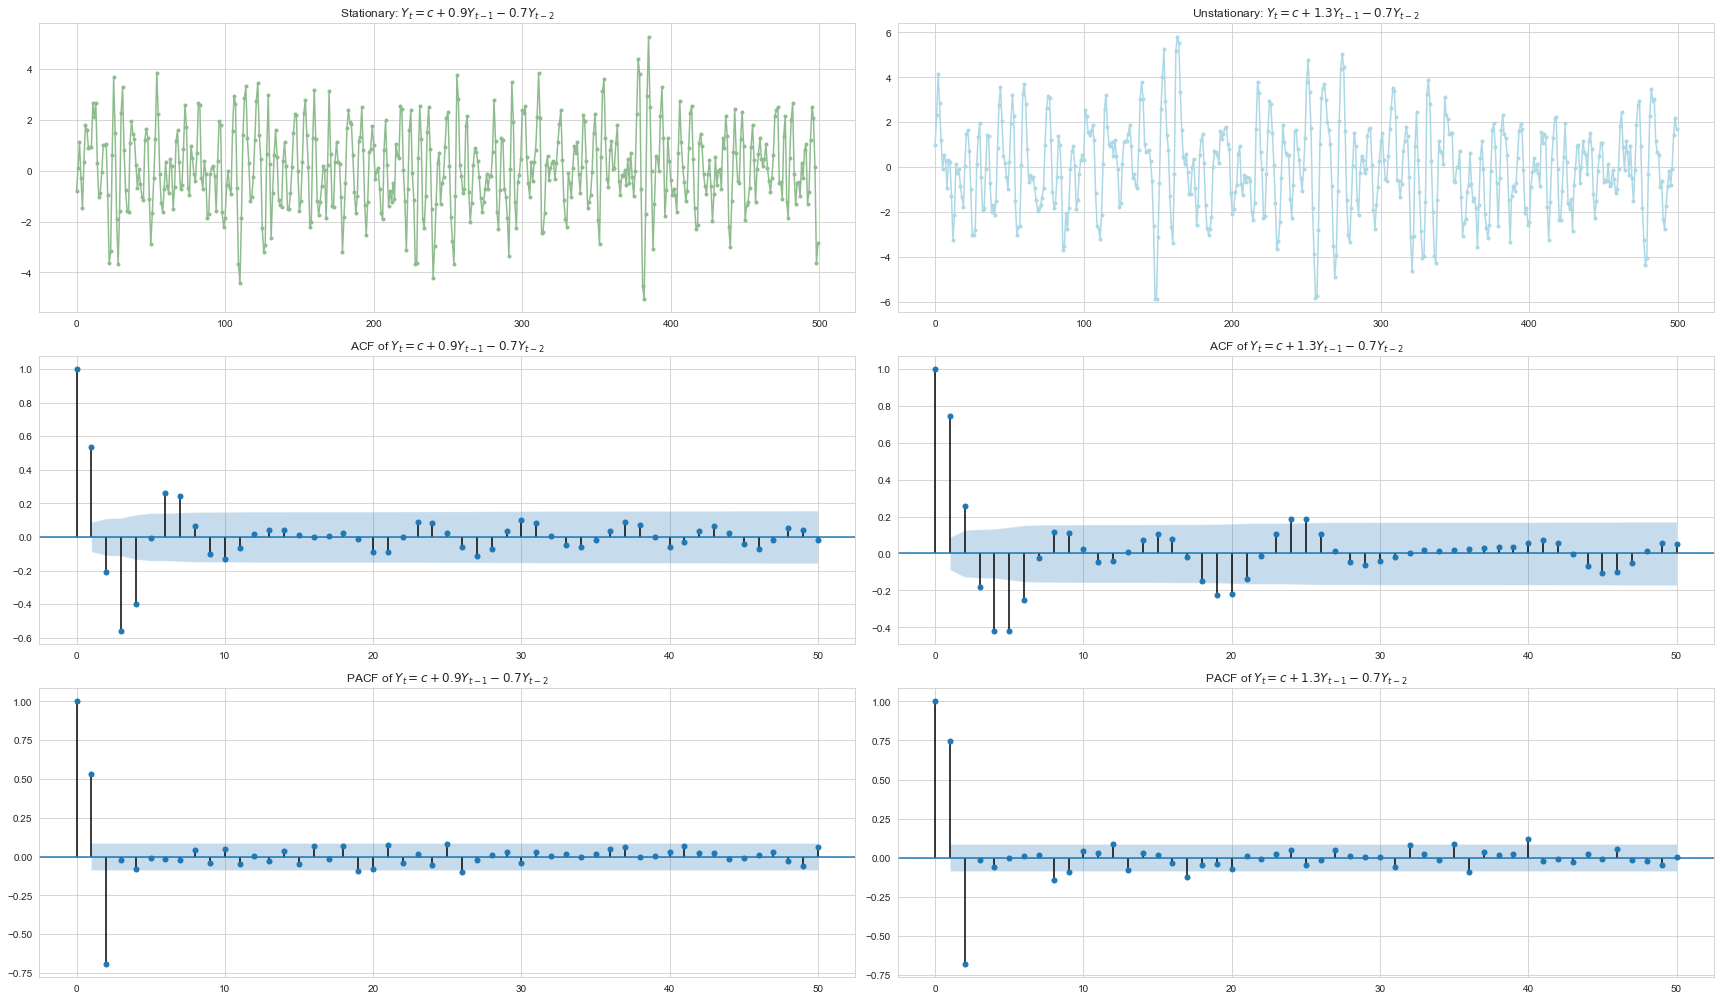

In [9]:
ma = np.array([1])
ar1 = np.array([1, -0.9, 0.7])
AR_object1 = ArmaProcess(ar1, ma)
simulated_data_1 = AR_object1.generate_sample(nsample=500)
ar2 = np.array([1, -1.3, 0.7])
AR_object2 = ArmaProcess(ar2, ma)
simulated_data_2 = AR_object2.generate_sample(nsample=500)
colors = ['darkseagreen', 'lightblue', 'plum', 'tan']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 14))
axes[0,0].plot(simulated_data_1, '.-', color=colors[0])
axes[0,0].set_title(r'Stationary: $Y_{t} = c + 0.9Y_{t-1} - 0.7Y_{t-2}$')

axes[0,1].plot(simulated_data_2, '.-', color=colors[1])
axes[0,1].set_title(r'Unstationary: $Y_{t} = c + 1.3Y_{t-1} - 0.7Y_{t-2}$')

tsaplots.plot_acf(simulated_data_1, lags=50, 
                  ax=axes[1,0], title=r'ACF of $Y_{t} = c + 0.9Y_{t-1} - 0.7Y_{t-2}$')
tsaplots.plot_acf(simulated_data_2, lags=50, 
                  ax=axes[1,1], title=r'ACF of $Y_{t} = c + 1.3Y_{t-1} - 0.7Y_{t-2}$')

tsaplots.plot_pacf(simulated_data_1, lags=50, 
                  ax=axes[2,0], title=r'PACF of $Y_{t} = c + 0.9Y_{t-1} - 0.7Y_{t-2}$')
tsaplots.plot_pacf(simulated_data_2, lags=50, 
                  ax=axes[2,1], title=r'PACF of $Y_{t} = c + 1.3Y_{t-1} - 0.7Y_{t-2}$')

plt.tight_layout()
plt.show()